In [21]:
import os
import glob
import argparse
import matplotlib

# Keras / TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'
from keras.models import load_model
from layers import BilinearUpSampling2D
from tensorflow.keras.layers import Layer, InputSpec
from utils import predict, load_images, display_images, compute_errors, save_images, evaluate
from matplotlib import pyplot as plt
from PIL import Image

In [18]:
# # convert jpeg images to png
# def convert_jpg_to_png():
#     # for filename in glob.glob('*.jpg'):
#     filename = "/home/ahmetaktas/DenseDepth/examples/test_ahmet_3.jpeg"
#     im = Image.open(filename)
#     rgb_im = im.convert('RGB')
#     rgb_im.save(filename[:-4] + '.png')

# convert_jpg_to_png()

In [20]:
# # webp to png
# def convert_webp_to_png():
#     filename = "/home/ahmetaktas/DenseDepth/examples/test_ahmet_4.webp"
#     im = Image.open(filename)
#     rgb_im = im.convert('RGB')
#     rgb_im.save(filename[:-5] + '.png')

# convert_webp_to_png()

In [22]:
image_folder_path = "/home/ahmetaktas/DenseDepth/examples/"

In [23]:
images = os.listdir(image_folder_path)
images = [image_folder_path + s for s in images]
test_images = [i for i in images if i.endswith(".png") and "test_ahmet" in i]
print(test_images)

['/home/ahmetaktas/DenseDepth/examples/test_ahmet_3..png', '/home/ahmetaktas/DenseDepth/examples/test_ahmet_2.png', '/home/ahmetaktas/DenseDepth/examples/test_ahmet_1.png', '/home/ahmetaktas/DenseDepth/examples/test_ahmet_4.png']


In [25]:
custom_objects = {'BilinearUpSampling2D': BilinearUpSampling2D, 'depth_loss_function': None}

# Model loaded from mnt directory
model_path = "/mnt/c/users/ozler/Downloads/nyu.h5"

print('Loading model...')
model = load_model(model_path, custom_objects=custom_objects, compile=False)
# Load model into GPU / CPU

print('\nModel loaded nyu.h5.')

# Input images
inputs = load_images(test_images)
print('\nLoaded ({0}) images of size {1}.'.format(inputs.shape[0], inputs.shape[1:]))

Loading model...

Model loaded nyu.h5.

Loaded (4) images of size (480, 640, 3).


In [26]:
outputs = predict(model, inputs)

2/2 [==============================] - 5s 2s/step


In [31]:
# save_images('outputs.png', outputs, is_rescale=True)

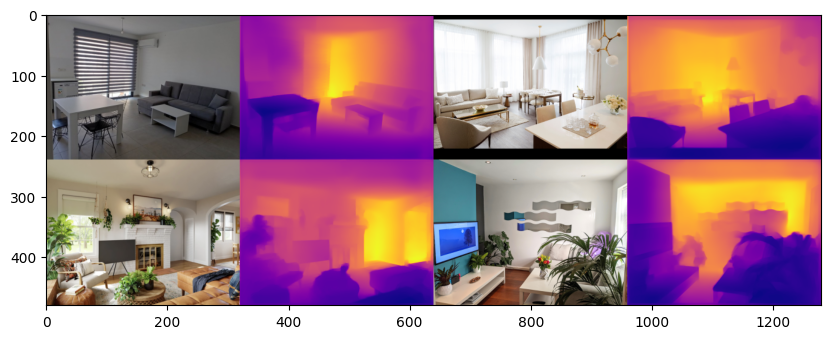

In [28]:
# # Display results
viz = display_images(outputs.copy(), inputs.copy())
plt.figure(figsize=(10,5))
plt.imshow(viz)
plt.show()